In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
category=['news',
 'business',
 'opinion',
 'national',
 'koseli',
 'technology',
 'health',
 'Interview',
]
df=pd.read_csv(category[0]+'.csv')
for i in category:
    read_data=pd.read_csv(i+'.csv')
    df=pd.concat([df,read_data])
df['News'].head()[0]

'काठमाडौँ — ०६७ मा दाङमा होटलबाट किशोरीलाई अपहरण गरी सामूहिक बलात्कार गर्नेलाई सर्वोच्च अदालतले १२ वर्षपछि सजाय दिएको छ\u202f। तर, जिल्ला र उच्च अदालतले दिएको न्यून सजायबाट फुत्किएका उनीहरूलाई पक्राउ गरेर सजाय असुल गर्न भने चुनौती छ\u202f। रुकुमको चुनवाङकी १८ वर्षकी लक्ष्मी (परिवर्तित नाम) आफ्ना केटा साथीसँग दाङको तुलसीपुरस्थित कृष्णसागर होटलमा बसेकी थिइन्\u202f। होटलमा होहल्ला गर्दै बसेका १० जना केटाहरूले टीभीको आवाज ठूलो बनाएर माथिल्लो तलासम्म डिस्टर्ब गरेपछि लक्ष्मीका केटा साथीले होटल साहूलाई गुनासो गरे\u202f। त्यसलगत्तै ती केटाहरू उनीमाथि जाइलागे\u202f। कुटपिट गरेर छाडिदिए तर लक्ष्मीलाई भने जबर्जस्ती उठाएर साबिक तुलसीपुर नगरपालिकाको वडा नं. ५ र ९ को बीचमा पर्ने पातुखोला किनारमा पुर्\u200dयाएर रातभर सामूहिक बलात्कार गरे\u202f। त्यसमा संलग्न भएकामध्ये तीन जनालाई सर्वोच्चले १६ वर्षको कैद सजाय सुनाएको छ\u202f।'

In [3]:
stop_words = stopwords.words("nepali")
stop_words.append('नं.')
stop_words.append('काठमाडौँ')
df['stopwords'] = df['News'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df[['News','stopwords']].head()

,News,stopwords
0,काठमाडौँ — ०६७ मा दाङमा होटलबाट किशोरीलाई अपहर...,20
1,काठमाडौँ — राजनीतिक दलको वर्चस्व रहेको काठमाडौ...,17
2,काठमाडौँ — सरकारले खोप खरिद गर्न लाग्ने ६ अर्ब...,34
3,काठमाडौँ — देशको कर्मचारी शक्तिशाली सरकारी३० ह...,11
4,काठमाडौँ — नयाँ शैक्षिक सत्रको पठनपाठन सुरु भइ...,21


In [4]:
stop_words

['छ',
 'र',
 'पनि',
 'छन्',
 'लागि',
 'भएको',
 'गरेको',
 'भने',
 'गर्न',
 'गर्ने',
 'हो',
 'तथा',
 'यो',
 'रहेको',
 'उनले',
 'थियो',
 'हुने',
 'गरेका',
 'थिए',
 'गर्दै',
 'तर',
 'नै',
 'को',
 'मा',
 'हुन्',
 'भन्ने',
 'हुन',
 'गरी',
 'त',
 'हुन्छ',
 'अब',
 'के',
 'रहेका',
 'गरेर',
 'छैन',
 'दिए',
 'भए',
 'यस',
 'ले',
 'गर्नु',
 'औं',
 'सो',
 'त्यो',
 'कि',
 'जुन',
 'यी',
 'का',
 'गरि',
 'ती',
 'न',
 'छु',
 'छौं',
 'लाई',
 'नि',
 'उप',
 'अक्सर',
 'आदि',
 'कसरी',
 'क्रमशः',
 'चाले',
 'अगाडी',
 'अझै',
 'अनुसार',
 'अन्तर्गत',
 'अन्य',
 'अन्यत्र',
 'अन्यथा',
 'अरु',
 'अरुलाई',
 'अर्को',
 'अर्थात',
 'अर्थात्',
 'अलग',
 'आए',
 'आजको',
 'ओठ',
 'आत्म',
 'आफू',
 'आफूलाई',
 'आफ्नै',
 'आफ्नो',
 'आयो',
 'उदाहरण',
 'उनको',
 'उहालाई',
 'एउटै',
 'एक',
 'एकदम',
 'कतै',
 'कम से कम',
 'कसै',
 'कसैले',
 'कहाँबाट',
 'कहिलेकाहीं',
 'का',
 'किन',
 'किनभने',
 'कुनै',
 'कुरा',
 'कृपया',
 'केही',
 'कोही',
 'गए',
 'गरौं',
 'गर्छ',
 'गर्छु',
 'गर्नुपर्छ',
 'गयौ',
 'गैर',
 'चार',
 'चाहनुहुन्छ',
 'चाहन्छु',
 'चाहिए

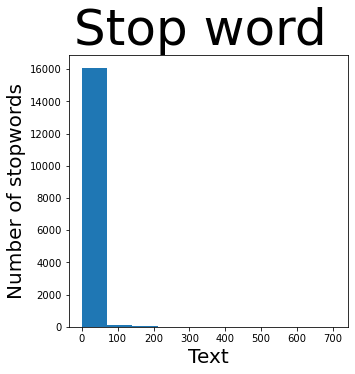

In [5]:
plt.figure(figsize=(5,5))
plt.title("Stop word ",fontsize=50)
plt.xlabel("Text",fontsize=20)
plt.ylabel("Number of stopwords",fontsize=20)
plt.hist(df.stopwords)
plt.show()

In [6]:
def string_manipulation(df,column)  : 
    df[column] = df[column].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,@,’,‘,:,\u200d]', '', x))
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split()if i not in (stop_words)]))
    return df
Data = string_manipulation(df,"News")
Data=string_manipulation(df,"Title")
Data.head()

,Unnamed: 0,Title,Label,News,stopwords
0,0,अपहरण सामूहिक बलात्कारका दोषीलाई वर्ष कैद,news,दाङमा होटलबाट किशोरीलाई अपहरण सामूहिक बलात्कार...,20
1,1,परम्परागत राजनीतिमाथि बालेनविद्रोह,news,राजनीतिक दलको वर्चस्व काठमाडौं महानगरपालिकाको ...,17
2,2,दाताको पर्दा खोप अनिश्चित,news,सरकारले खोप खरिद लाग्ने अर्ब रुपैयाँ बचाउन खोज...,34
3,3,र्यापबाटै राजनीति,news,देशको कर्मचारी शक्तिशाली सरकारी हजारको तलब वटा...,11
4,4,लाख पुस्तक छाप्नै बाँकी,news,शैक्षिक सत्रको पठनपाठन सुरु भइसके लाख थान पाठ्...,21


In [7]:
pop_wrds = (Data["News"].apply(lambda x : 
                                         pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
pop_wrds.columns = ["word","count"]
pop_wrds.head()

,word,count
1505,काठमाडौ,7298.0
104,काठमाडौं,6069.0
375,नेपाल,3215.0
333,भएका,2404.0
485,नेपाली,2174.0


In [8]:
Data=Data[['Title', 'Label', 'News']]

In [9]:
Data.to_csv("Preprocess.csv")

In [10]:
Data.shape

(16250, 3)

In [11]:
category=['news',
 'business',
 'opinion',
 'national',
 'koseli',
 'technology',
 'health',
 'Interview',
 'Art',
 'Other',
]
try:
    for i in category:
        read_data=pd.read_csv(i+'.csv')
        print(i,read_data.shape)
except:
    print("getting error")

news (3019, 4)
business (2950, 4)
opinion (2878, 4)
national (1778, 4)
koseli (454, 4)
technology (992, 4)
health (1029, 4)
Interview (131, 4)
getting error


In [14]:
df.iloc[95].News

'धादिङ —  धादिङ जिल्ला भित्र पर्ने त्रिभुवन राजपथ अन्तर्गत पिपलामोड नौबिसे खण्डका सडक अतिक्रमण गरि बनाईएका ९३ घर टहरा सबै भत्काइएको छ\xa0।सडक सिमा अतिक्रमण गरेर बस्नेहरुको संख्या बढ्दै जांदा सवारी दुर्घटना लगायतका समस्याहरु बढ्दै गएकाले शनिबारदेखि सडक विभागले घर टहरा भत्काउन थालेको हो\xa0। परासी — जिल्ला स्थित रहेका गिद्ध रेष्टुरेन्ट वरिपरि रहेका गिद्धका गुण र गिद्धका संख्या पत्ता लगाउनका लागि गिद्ध संरक्षणकर्ताहरुले गिद्धको गणना शुरु गरेको छन्\xa0। केही समय पहिला जिल्लामा गिद्धको संख्या बढेको तर हाल आएर गिद्धका संख्यामा केही कमी देखिएकोले गणना गर्न शुरु गरेका हुन्\xa0।'

In [15]:
final_result={
    "Actual_Title":['दाताको भर पर्दा खोप अनिश्चित','दुई दिनमा ९३ घरटहरा भत्काइयो','बेहोस बनाएर बसमा लुटपाट','नेपाल–भारत सीमा सुरक्षा बैठक'],
    "Predicted_Title":['भर पर्दा खोपमा अनिश्चिताा ','अतिक्रमण गरि बनाईएका घर भत्काइयो','बेहोस बनाएर लुटपाट','नेपाल–भारत बैठक']
}
pd.DataFrame(final_result)

,Actual_Title,Predicted_Title
0,दाताको भर पर्दा खोप अनिश्चित,भर पर्दा खोपमा अनिश्चिताा
1,दुई दिनमा ९३ घरटहरा भत्काइयो,अतिक्रमण गरि बनाईएका घर भत्काइयो
2,बेहोस बनाएर बसमा लुटपाट,बेहोस बनाएर लुटपाट
3,नेपाल–भारत सीमा सुरक्षा बैठक,नेपाल–भारत बैठक
